## Gold Price Prediction: Project P111


### Importing Libraries

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import Grouper
import calplot
import calmap
import calendar
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
%matplotlib inline

In [3]:
#import the given dataset as a series object for time series analysis
series = pd.read_csv(r'C:\Users\Arman Soni\OneDrive\Desktop\ExcelR\Projects\Gold_data.csv',index_col=0, parse_dates=True)#, header=0, index_col=0, parse_dates=True, squeeze=True)
series

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [4]:
#converting date to date-time
series.columns=["price"]
series.index=pd.to_datetime(series.index)
series

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [5]:
series_2 = series.copy()

### Train-Test Split

In [6]:
#Doing 80:20 Split
Train=series.iloc[:1745,:]
Test=series.iloc[1745:,]

### Initial Exploration (EDA) of RAW Data

In [7]:
#descriptive statistics to know more about the raw data
series.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [8]:
#how many observations
series.size

2182

In [9]:
#check january 2016 data - COMPLETE data is present for each day including holidays
series['2016-01']

,price
date,
2016-01-01,2252.600000
2016-01-02,2454.500000
2016-01-03,2708.100000
2016-01-04,2577.800000
2016-01-05,2597.750000
2016-01-06,2617.700000
2016-01-07,2903.800000
2016-01-08,2887.800000
2016-01-09,2813.800000


In [10]:
series['2017-05'].head(8) #random may 2017

,price
date,
2017-05-01,2559.4
2017-05-02,2573.2
2017-05-03,2587.0
2017-05-04,2600.8
2017-05-05,2532.4
2017-05-06,2643.5
2017-05-07,2538.3
2017-05-08,2643.3


In [11]:
series['2021-12'] #last month only 21 days

,price
date,
2021-12-01,4353.2
2021-12-02,4238.1
2021-12-03,4017.1
2021-12-04,4170.4
2021-12-05,4305.5
2021-12-06,4413.6
2021-12-07,4319.4
2021-12-08,4181.5
2021-12-09,4219.4


In [30]:
#reading as data frame
df = pd.read_csv("C:\\Users\\Arman Soni\\OneDrive\\Desktop\\ExcelR\\Projects\\Gold_data.csv")
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [31]:
#checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [32]:
#converting object to date time
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


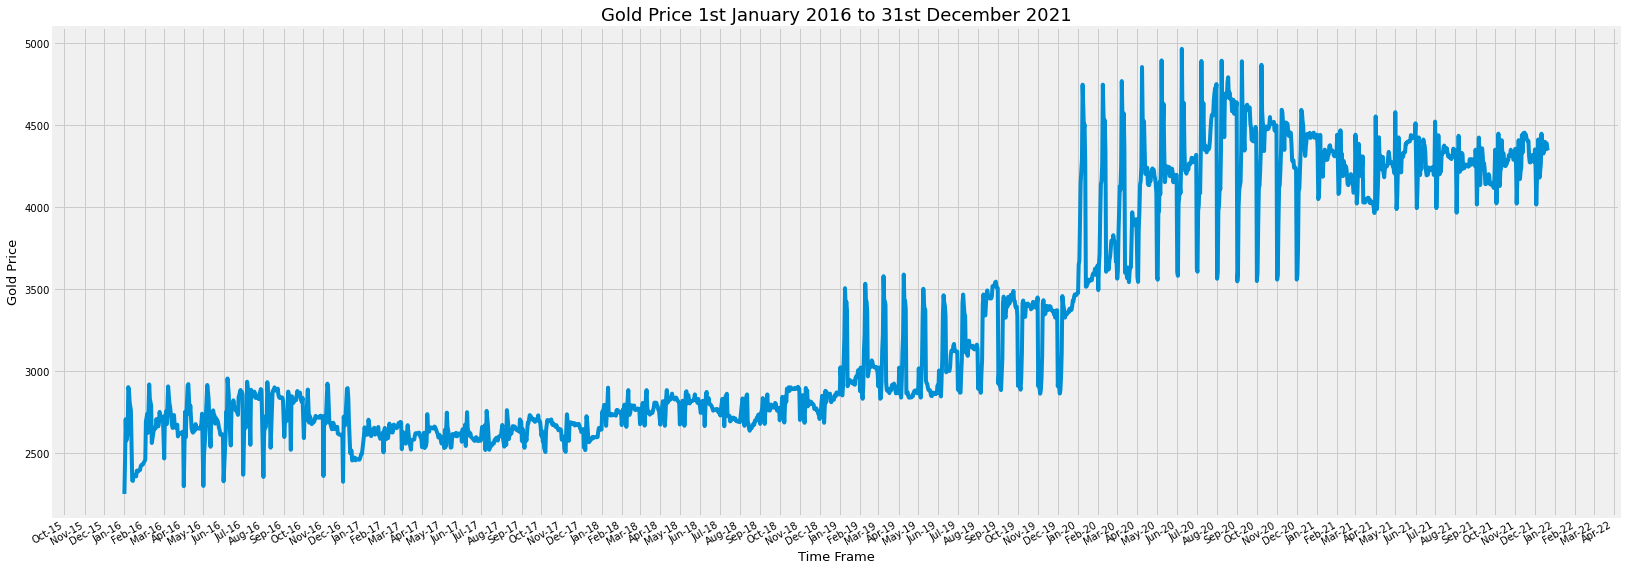

In [33]:
################# GOLD PRICE FROM BEGINNING ################

# build the frame
fig,ax = plt.subplots(figsize=(25,10))

date = df['date']
value = df['price']

# give the title, x and y axis names
plt.title("Gold Price 1st January 2016 to 31st December 2021",fontsize=18)
plt.xlabel("Time Frame",fontsize=13)
plt.ylabel("Gold Price",fontsize=13)

# display formatting
year_month_separator = mdates.MonthLocator()
year_month_formatter = mdates.DateFormatter("%b-%y")

ax.xaxis.set_major_locator(year_month_separator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(date,value);

# auto format tilt the x-axis labels
fig.autofmt_xdate()

In [34]:
df = df.set_index(['date'])
df

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


(<Figure size 1440x1080 with 6 Axes>,
 array([<AxesSubplot:ylabel='2016'>, <AxesSubplot:ylabel='2017'>,
        <AxesSubplot:ylabel='2018'>, <AxesSubplot:ylabel='2019'>,
        <AxesSubplot:ylabel='2020'>, <AxesSubplot:ylabel='2021'>],
       dtype=object))

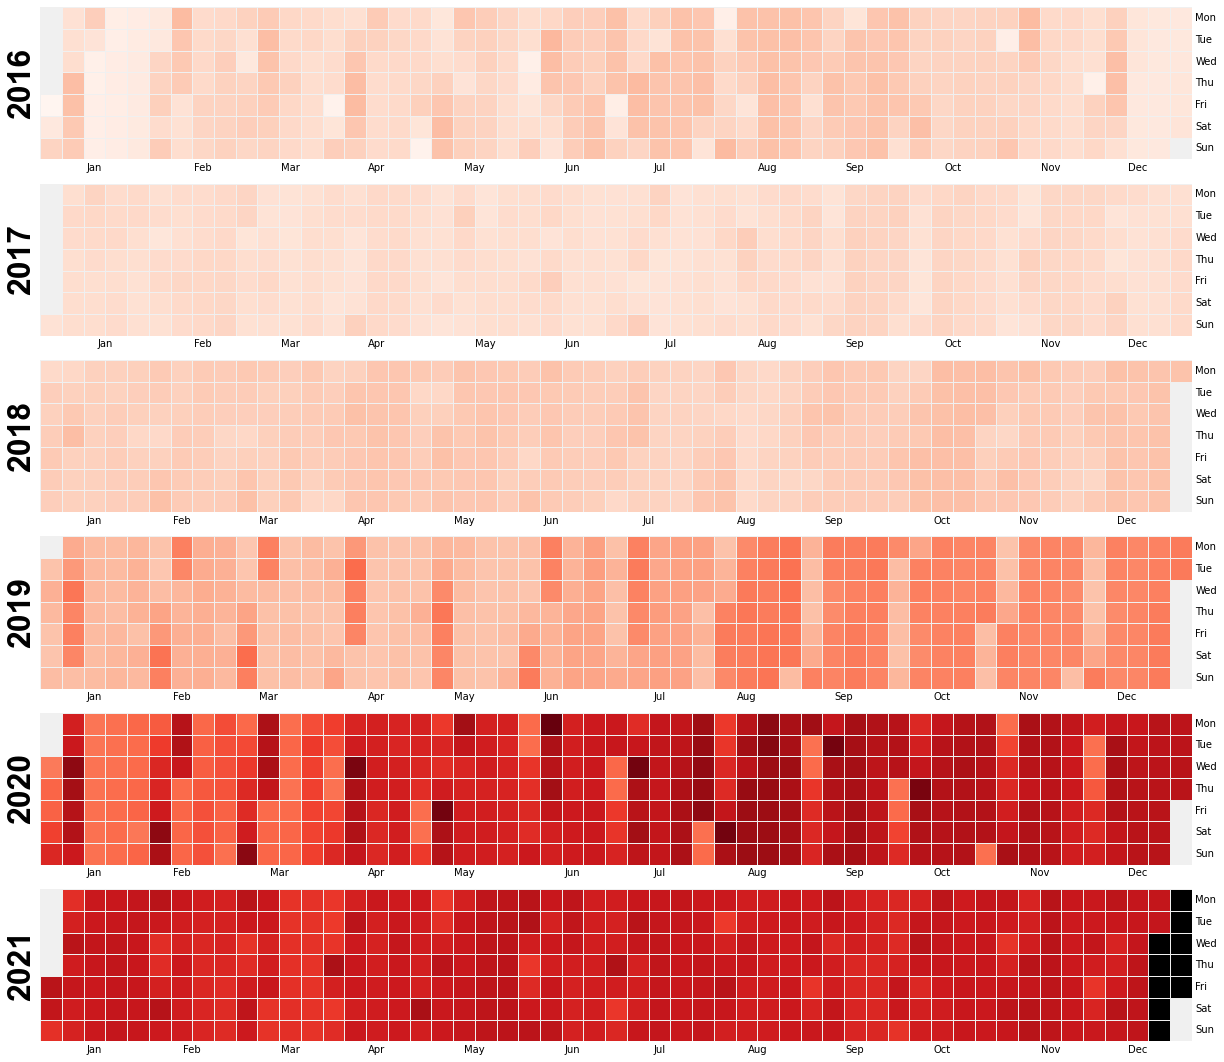

In [35]:
################ YEARLY SEASONAL PRICE #####################
calmap.calendarplot(df['price'], fillcolor='black',fig_kws=dict(figsize=(20, 15)))

In [36]:
df_2 = df.reset_index()
df_2

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [37]:
################ AVERAGE PRICE EVERY MONTH #####################

#Spliting the dates
df_2['Day'] = df_2['date'].dt.day
df_2['Month'] = df_2['date'].dt.month
df_2['Year'] = df_2['date'].dt.year
df_2

,date,price,Day,Month,Year
0,2016-01-01,2252.60,1,1,2016
1,2016-01-02,2454.50,2,1,2016
2,2016-01-03,2708.10,3,1,2016
3,2016-01-04,2577.80,4,1,2016
4,2016-01-05,2597.75,5,1,2016
...,...,...,...,...,...
2177,2021-12-17,4394.40,17,12,2021
2178,2021-12-18,4389.50,18,12,2021
2179,2021-12-19,4389.50,19,12,2021
2180,2021-12-20,4354.10,20,12,2021


In [38]:
#  Generating the avgerage open gold price
all_month_year_df = pd.pivot_table(df_2, values="price",
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
# Setting the index (month names)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

Year,2016,2017,2018,2019,2020,2021,All
Jan,2495.832258,2626.077957,2748.438710,3015.954839,3803.264516,4305.209677,3165.796326
Feb,2688.703448,2646.730357,2766.942857,3068.482143,3903.472414,4208.853571,3214.831471
Mar,2682.854839,2597.485484,2766.806452,2989.967742,3915.170968,4118.264516,3178.425000
Apr,2677.790000,2620.758333,2806.903333,2970.890000,4187.580000,4259.273333,3253.865833
May,2677.650000,2605.872581,2806.258065,2978.335484,4208.000000,4346.348387,3270.410753
Jun,2745.596667,2607.733333,2781.715000,3098.686667,4250.550000,4262.783333,3291.177500
Jul,2779.582258,2599.256452,2739.325806,3136.961290,4393.832258,4308.632258,3326.265054
Aug,2792.240323,2642.133871,2722.327419,3351.954839,4491.829032,4264.919355,3377.567473
Sep,2792.705000,2669.835000,2777.303333,3310.843333,4399.250000,4207.506667,3359.573889
Oct,2720.454839,2648.345161,2851.996774,3300.645161,4388.651613,4289.148387,3366.540323


In [39]:
type(all_month_year_df)

pandas.core.frame.DataFrame

In [40]:
#converting float to integers
all_month_year_df_2 = all_month_year_df.astype(int)
all_month_year_df_2

Year,2016,2017,2018,2019,2020,2021,All
Jan,2495,2626,2748,3015,3803,4305,3165
Feb,2688,2646,2766,3068,3903,4208,3214
Mar,2682,2597,2766,2989,3915,4118,3178
Apr,2677,2620,2806,2970,4187,4259,3253
May,2677,2605,2806,2978,4208,4346,3270
Jun,2745,2607,2781,3098,4250,4262,3291
Jul,2779,2599,2739,3136,4393,4308,3326
Aug,2792,2642,2722,3351,4491,4264,3377
Sep,2792,2669,2777,3310,4399,4207,3359
Oct,2720,2648,2851,3300,4388,4289,3366


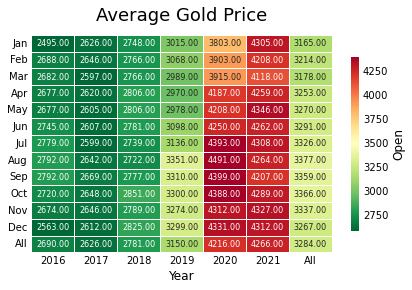

In [41]:
# plot of average gold price for all months
ax = sns.heatmap(all_month_year_df_2, cmap='RdYlGn_r', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':8}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Average Gold Price', fontdict={'fontsize':18},    pad=14);

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

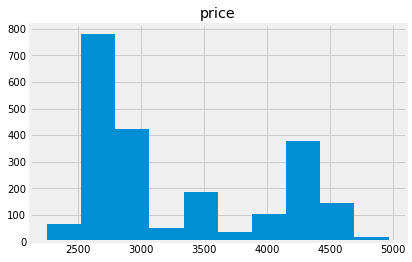

In [42]:
series.hist() #histogram plot

<AxesSubplot:ylabel='Density'>

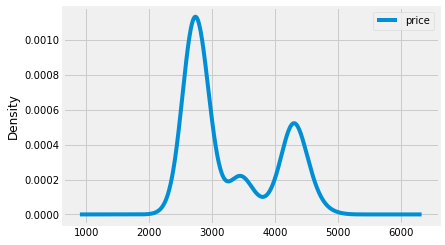

In [43]:
series.plot(kind='kde')

### Pre-processing Data for Model Building

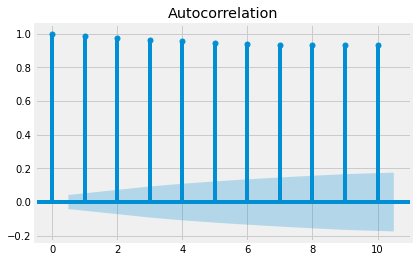

In [44]:
#auto correlation plot
plot_acf(series, lags=10)
plt.show()

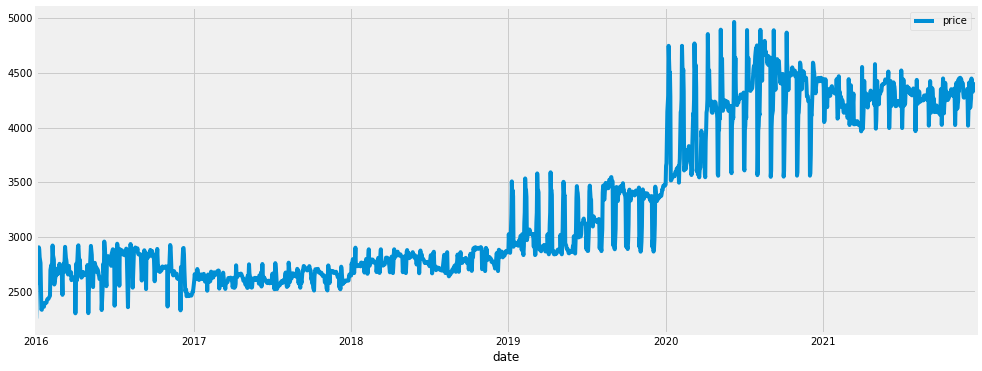

In [45]:
# overall plot for years
series.plot(figsize=(15,6))
plt.show()

In [46]:
#split series into years to show decomposition
series_jan_2016 = series['2016-01']#:'2017-01']
series_jan_2017 = series['2017-01']
series_jan_2018 = series['2018-01']
series_jan_2019 = series['2019-01']
series_jan_2020 = series['2020-01']
series_jan_2021 = series['2021-01']



*************************************************************************************ANALYSIS FOR 2016**************************************************************************



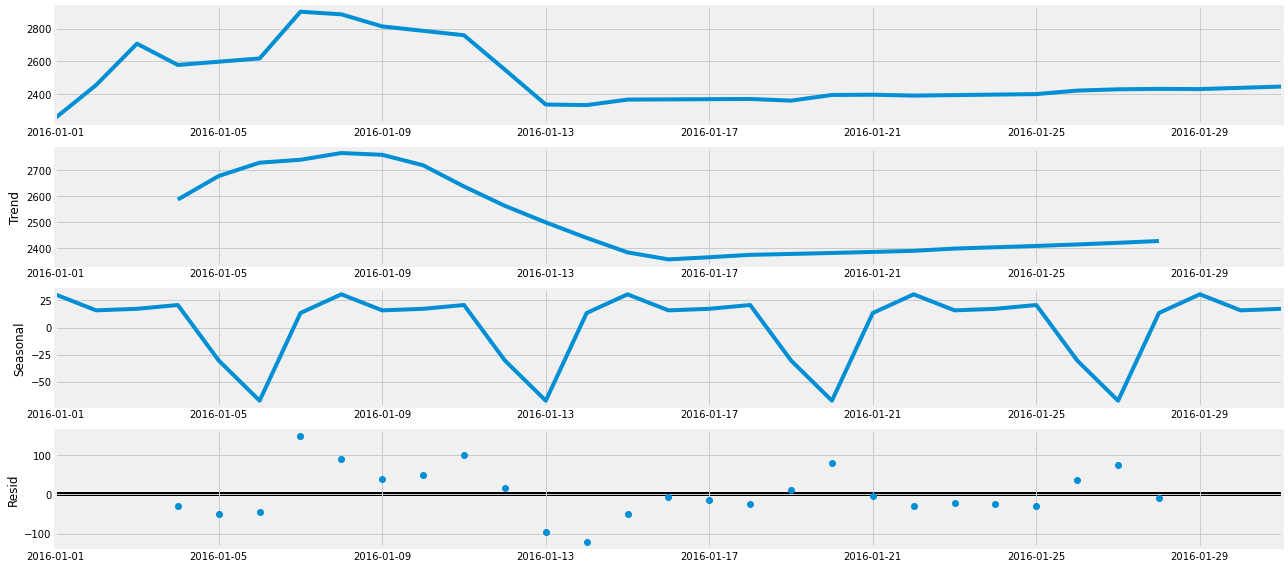



*************************************************************************************ANALYSIS FOR 2017**************************************************************************



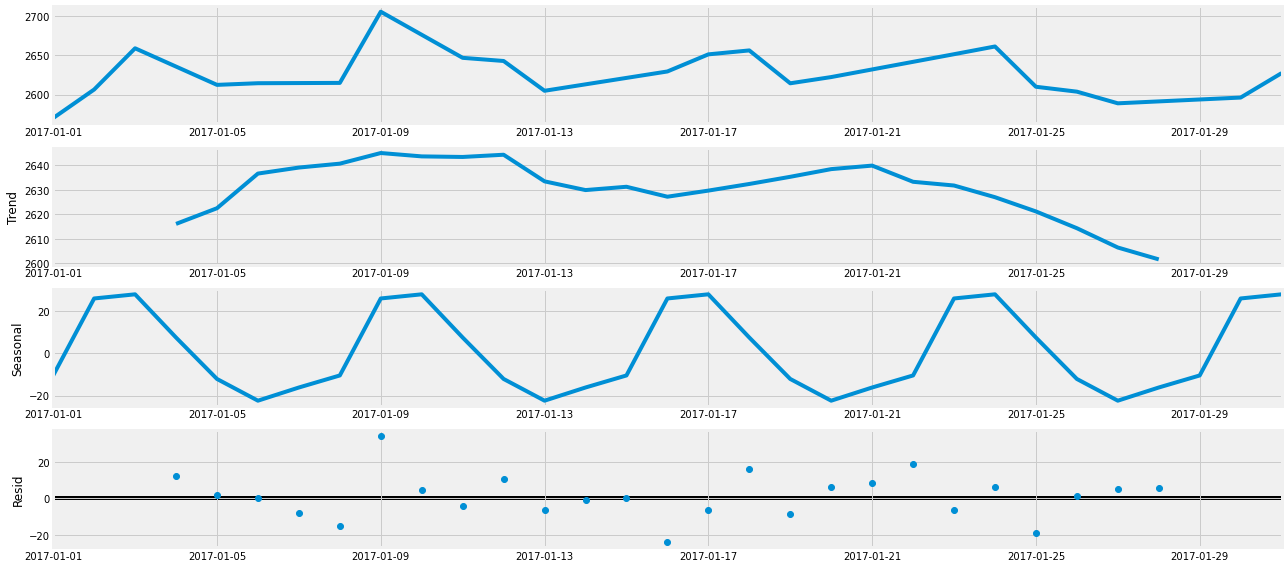



*************************************************************************************ANALYSIS FOR 2018**************************************************************************



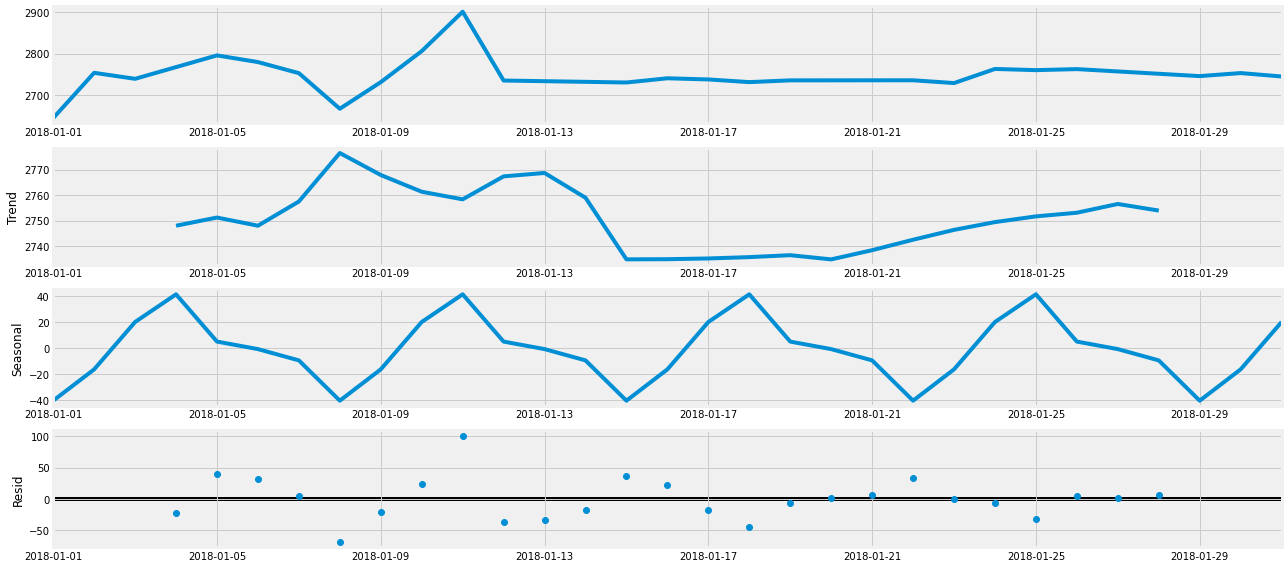



*************************************************************************************ANALYSIS FOR 2019**************************************************************************



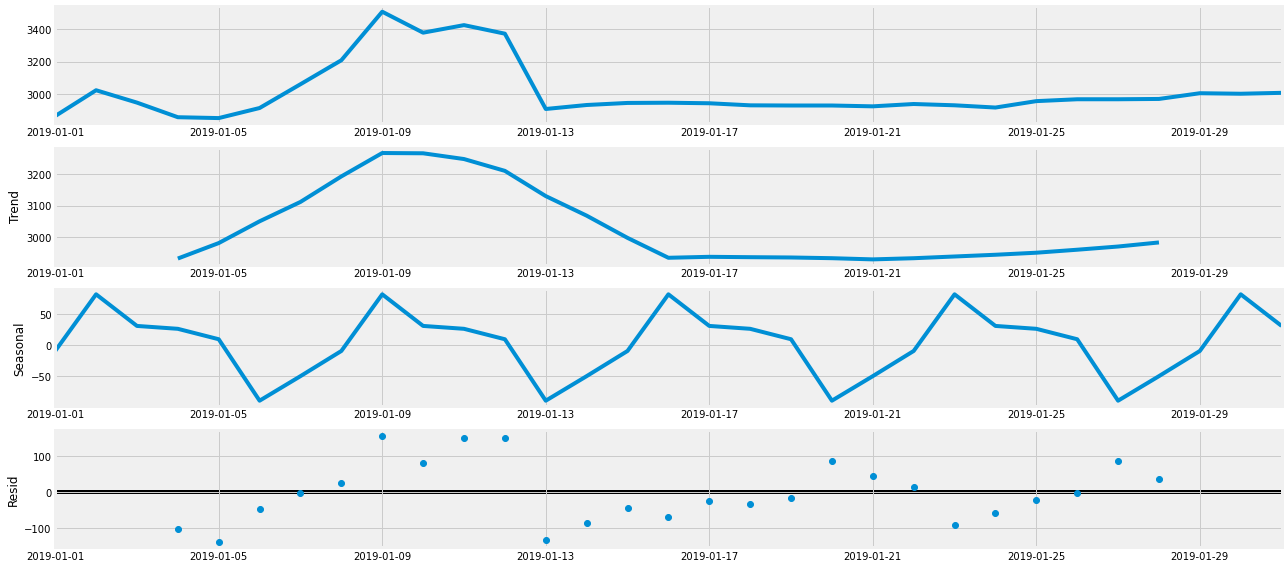



*************************************************************************************ANALYSIS FOR 2020**************************************************************************



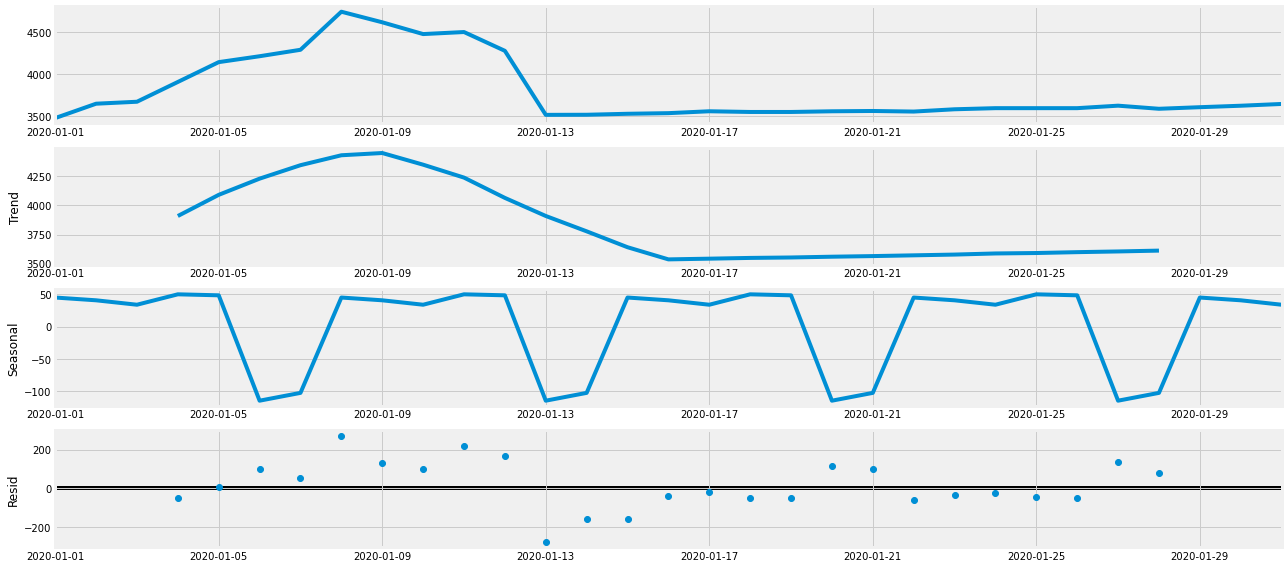



*************************************************************************************ANALYSIS FOR 2021**************************************************************************



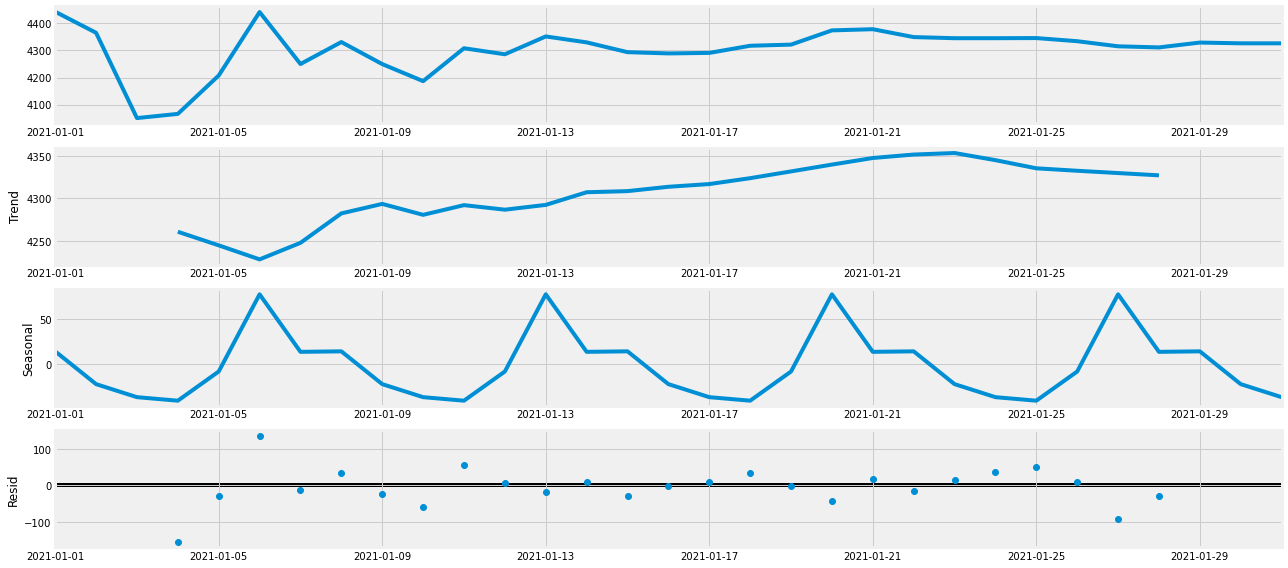

In [47]:
#decomposing time series
rcParams['figure.figsize'] = 18, 8

print("\n")
print("*************************************************************************************ANALYSIS FOR 2016**************************************************************************")
print()
decomposition = sm.tsa.seasonal_decompose(series_jan_2016)
fig = decomposition.plot()
plt.show()

print("\n")
print("*************************************************************************************ANALYSIS FOR 2017**************************************************************************")
print()
decomposition = sm.tsa.seasonal_decompose(series_jan_2017)
fig = decomposition.plot()
plt.show()

print("\n")
print("*************************************************************************************ANALYSIS FOR 2018**************************************************************************")
print()
decomposition = sm.tsa.seasonal_decompose(series_jan_2018)
fig = decomposition.plot()
plt.show()

print("\n")
print("*************************************************************************************ANALYSIS FOR 2019**************************************************************************")
print()
decomposition = sm.tsa.seasonal_decompose(series_jan_2019)
fig = decomposition.plot()
plt.show()

print("\n")
print("*************************************************************************************ANALYSIS FOR 2020**************************************************************************")
print()
decomposition = sm.tsa.seasonal_decompose(series_jan_2020)
fig = decomposition.plot()
plt.show()

print("\n")
print("*************************************************************************************ANALYSIS FOR 2021**************************************************************************")
print()
decomposition = sm.tsa.seasonal_decompose(series_jan_2021)
fig = decomposition.plot()
plt.show()

In [48]:
#checking skews

In [49]:
Train.skew()

price    1.557813
dtype: float64

In [50]:
#checking if log and square root solve the problem

In [51]:
Train_log = np.log(Train) #log transform
Train_log.skew()

price    1.315869
dtype: float64

In [52]:
Train_sqrt = np.sqrt(Train) #square root transform
Train_sqrt.skew()

price    1.436822
dtype: float64

In [53]:
#defining mean absolute percentage error

In [54]:
def mean_absolute_percentage_error(test, predictions): 
    test, predictions = np.array(test), np.array(predictions)
    return np.mean(np.abs((test - predictions) / test)) * 100

### Data Transformation using Boxcox

In [55]:
#Doing boxcox transform

In [56]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox

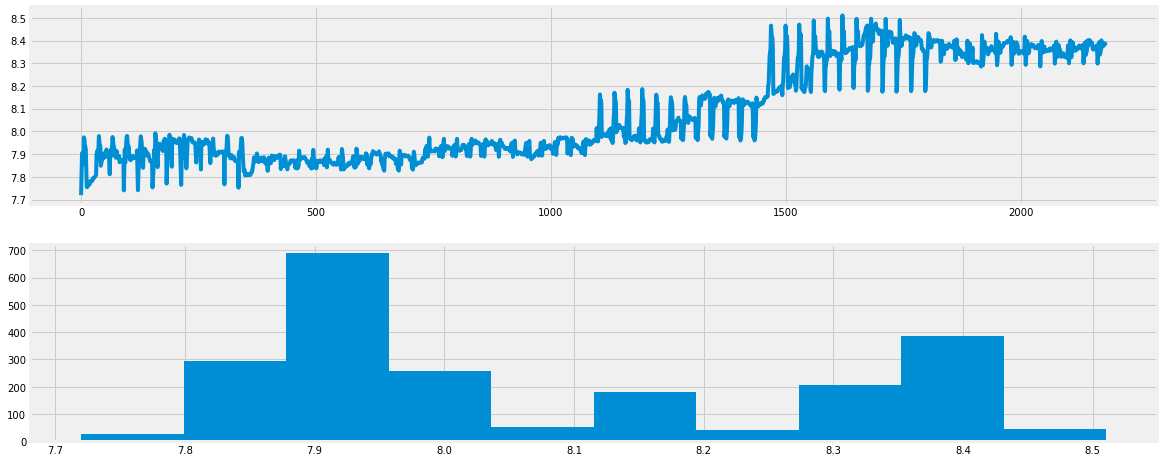

In [58]:
series = read_csv(r'C:\Users\Arman Soni\OneDrive\Desktop\ExcelR\Projects\Gold_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['price']
dataframe['price'] = stats.boxcox(dataframe['price'], lmbda=0.0)
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(dataframe['price'])
# histogram
plt.subplot(212)
plt.hist(dataframe['price'])
plt.show()

### Train-Test Split for Model

In [59]:
#Again doing 80:20 Split
Train=dataframe.iloc[:1745,:]
Test=dataframe.iloc[1745:,]

### Model Buidling & Evaluation (Selected Model: Holts winter exponential smoothing with additive seasonality and additive trend)

In [60]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["price"],seasonal="add",trend="add",seasonal_periods=365).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
mean_absolute_percentage_error(pred_hwe_add_add,Test.price)

E:\Personal Docs\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1.3455500211299682

In [61]:
hwe_model_add_add = ExponentialSmoothing(dataframe["price"],seasonal="add",trend="add",seasonal_periods=365).fit()

E:\Personal Docs\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Forecasting for next 30 days

In [62]:
Forecasted_price = hwe_model_add_add.forecast(30)
Forecasted_price

2182    8.376872
2183    8.380533
2184    8.380460
2185    8.381050
2186    8.386325
2187    8.389124
2188    8.387685
2189    8.387697
2190    8.388937
2191    8.405736
2192    8.447941
2193    8.435615
2194    8.429513
2195    8.440768
2196    8.468927
2197    8.486220
2198    8.493605
2199    8.514697
2200    8.500868
2201    8.491670
2202    8.460538
2203    8.399231
2204    8.405794
2205    8.406484
2206    8.406545
2207    8.408318
2208    8.406336
2209    8.407220
2210    8.408286
2211    8.410350
dtype: float64

### Doing Inverse of Transform to get True Predictions

In [63]:
Forecasted_price_true = inv_boxcox(Forecasted_price, 0.0)
Forecasted_price_true

2182    4345.395768
2183    4361.333076
2184    4361.013971
2185    4363.590209
2186    4386.667769
2187    4398.962084
2188    4392.636855
2189    4392.691115
2190    4398.139906
2191    4472.647639
2192    4665.455723
2193    4608.301838
2194    4580.269388
2195    4632.111194
2196    4764.402019
2197    4847.509509
2198    4883.440740
2199    4987.533332
2200    4919.035072
2201    4874.000847
2202    4724.596833
2203    4443.647462
2204    4472.907295
2205    4475.993293
2206    4476.266957
2207    4484.211013
2208    4475.334177
2209    4479.291732
2210    4484.068507
2211    4493.331126
dtype: float64

### Plotting predictions in graph

In [64]:
series_no_inx = series_2.reset_index()
series_no_inx

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [65]:
Forecasted_price_true

2182    4345.395768
2183    4361.333076
2184    4361.013971
2185    4363.590209
2186    4386.667769
2187    4398.962084
2188    4392.636855
2189    4392.691115
2190    4398.139906
2191    4472.647639
2192    4665.455723
2193    4608.301838
2194    4580.269388
2195    4632.111194
2196    4764.402019
2197    4847.509509
2198    4883.440740
2199    4987.533332
2200    4919.035072
2201    4874.000847
2202    4724.596833
2203    4443.647462
2204    4472.907295
2205    4475.993293
2206    4476.266957
2207    4484.211013
2208    4475.334177
2209    4479.291732
2210    4484.068507
2211    4493.331126
dtype: float64

In [66]:
series_no_inx_dec = series_no_inx[2050:]
series_no_inx_dec

,date,price
2050,2021-08-12,4324.5
2051,2021-08-13,4236.0
2052,2021-08-14,4239.8
2053,2021-08-15,4239.8
2054,2021-08-16,4255.5
...,...,...
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1


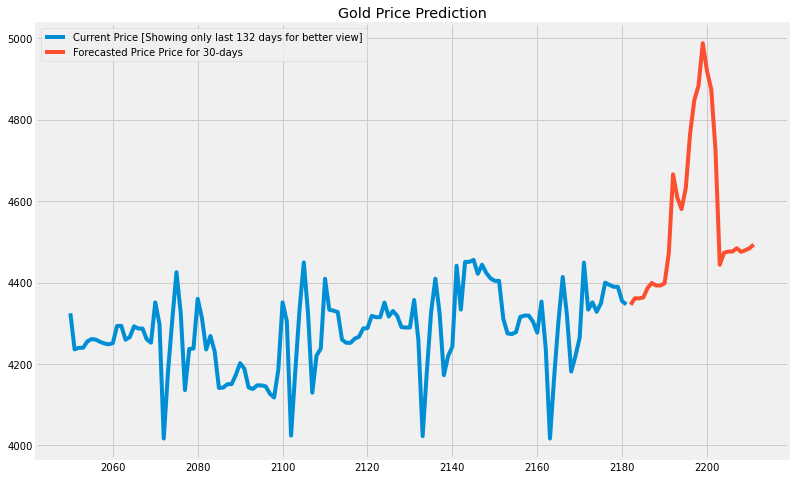

In [67]:
series_no_inx_dec['price'].plot(figsize=(12,8),legend=True,label='Current Price [Showing only last 132 days for better view]')
Forecasted_price_true.plot(legend=True,label='Forecasted Price Price for 30-days')
plt.title('Gold Price Prediction');